In [1]:
#install.packages("/Users/alexplocik/R packages/devtools_1.9.1.tgz", repos = NULL)
#install.packages("/Users/alexplocik/R packages/curl_0.9.3.tgz", repos = NULL)
#install.packages("/Users/alexplocik/R packages/httr_1.0.0.tgz", repos = NULL)

In [2]:
#source_url("https://raw.githubusercontent.com/obigriffith/biostar-tutorials/master/Heatmaps/heatmap.3.R")
#install_github(username = "obigriffith", repo = "heatmap.3.R")

# <i>Dscam</i> Manuscript (Figure 2)
This notebook details to code for visualizations produced for Figure 2 of the <i>Dscam</i> RNAi manuscript.

## Environment setup

In [4]:
# Set working directory
# setwd("/Users/alexplocik/Google Drive/UConn/Lab Notebook/Dscam 4.2 EMAP/miSeq data analysis/")

# Install required packages
require(gplots)
require(ggplot2)
require(grid)
require(RColorBrewer)
require(repr)
require(plyr)
require(gplots)
source("packages/heatmap.3.R")

# Set figure dimensions for notebook
options(repr.plot.width = 6, repr.plot.height = 3)

## Custom functions

In [5]:
# A ggplot theme good for small manuscript sized images
theme_bw_small <- function (base_size = 10, base_family = "") 
{
  theme_grey(base_size = base_size, base_family = base_family) %+replace% 
    theme(axis.text = element_text(size = rel(0.8)),
          axis.text.x = element_text(angle = 90, vjust = 0.5),
          axis.ticks = element_line(colour = "black"), 
          legend.key = element_rect(colour = "grey80"),
          panel.background = element_rect(fill = "white", colour = NA),
          panel.border = element_rect(fill = NA, colour = "grey50"), 
          panel.grid.major = element_line(colour = "grey90", size = 0.2), 
          panel.grid.minor = element_line(colour = "grey98", size = 0.5), 
          strip.background = element_rect(fill = "white", colour = "white", size = 0.2)) 
} # theme_bw_small()

plotting.factor.levels <- function(data){
  data$library <- factor(data$library, levels = levels(factor(data$library))[c(3:8, 1:2)], labels = gsub(" \\(", "\n(", levels(factor(data$library)))[c(3:8, 1:2)])
  data$exon <- factor(data$exon, levels = levels(factor(data$exon))[c(3:length(levels(factor(data$exon))), 1:2)])
  data
} # plotting.factor.levels()

## Read data from file
Documentation on the generation of this data file is descibed in the "Dscam Manuscript Analysis" notebook.

In [6]:
all <- read.csv("data/Combined RNAi experiment data.csv", row.names = 1); all <- plotting.factor.levels(all)
all.filter <- subset(all, PSI.median > 0.1 & ((exon_cluster != 17 & cor >= 0.8) | exon_cluster == 17))
sig.hits <- read.csv("data/Significant z-scores.csv")
sig.matrix <- read.csv("data/Significant z-score matrix.csv", row.names = 1)

# Figure 2A.
The following figure illustrates RNAi depletion affects on variant exon PSI. The data was first filtered to remove exons with < 0.1 PSI and experiments with a Spearman correlation coefficient of < 0.8. Points indicate outliers.

In [7]:
# To produce plots from the unfiltered data.
#data <- all
#ggplot(subset(data, splice_event == "inclusion"), aes(x = exon, y = PSI,  color = library)) + geom_boxplot(outlier.size = 1) + facet_grid(. ~ exon_cluster, space = "free", scale = "free") + scale_color_manual(values = brewer.pal(8, "Paired")) + theme_bw_small() + ylab("Variant exon PSI") + xlab("")
#ggsave("Figures/Figure 2A. Exon variant inclusion PSI boxplots and points.pdf", height = 6, width = 20)
#ggplot(subset(data, splice_event == "skipping"), aes(x = exon, y =  PSI,  color = library)) + geom_boxplot(outlier.size = 1) + facet_grid(. ~ exon_cluster, space = "free", scale = "free") + scale_color_manual(values = brewer.pal(8, "Paired")) + theme_bw_small() + ylab("Percent skipping") + xlab("")
#ggsave("Figures/Figure 2A. Exon variant skipping PSI boxplots and points.pdf", height = 6, width = 3)

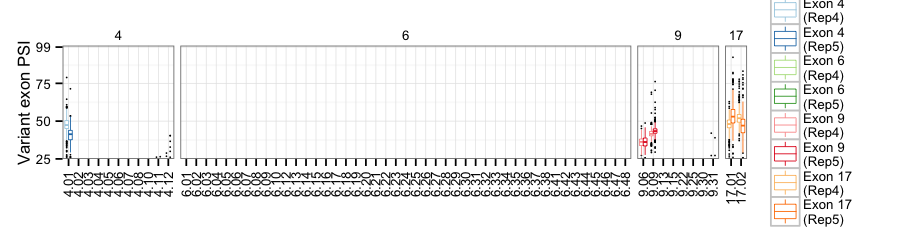

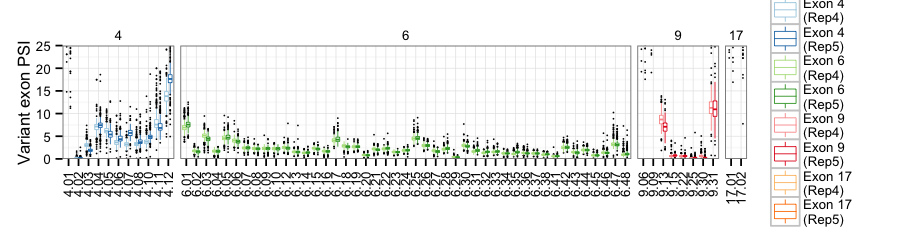

In [16]:
w = 7.5; h = 2; options(repr.plot.width = w, repr.plot.height = h)

data <- all.filter
p <- ggplot(subset(data, splice_event == "inclusion"), aes(x = exon, y = PSI,  color = library)) +
  geom_boxplot(outlier.size = 0.5, size = 0.25) +
  facet_grid(. ~ exon_cluster, space = "free", scale = "free") +
  scale_color_manual(values = brewer.pal(8, "Paired")) +
  theme_bw_small() +
  ylab("Variant exon PSI") +
  xlab("")
p + scale_y_continuous(breaks = c(25, 50, 75, 99)) + coord_cartesian(ylim=c(25, 100))
ggsave("Figures/Figure 2A top. Exon variant inclusion PSI boxplots and points (filtered).pdf", height = h, width = w)
p + scale_y_continuous(breaks = c(seq(0, 25, 5))) + coord_cartesian(ylim=c(0, 25))
ggsave("Figures/Figure 2A bottom. Exon variant inclusion PSI boxplots and points (filtered).pdf", height = h, width = w)

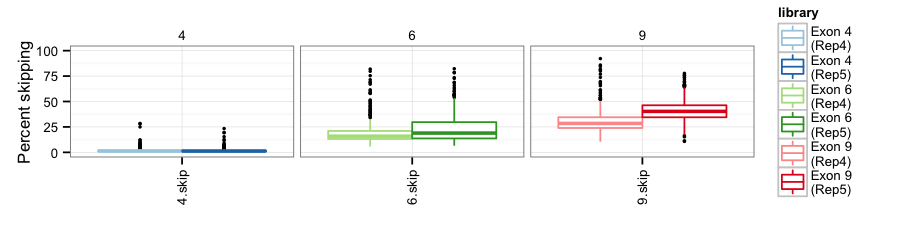

In [17]:
ggplot(subset(data, splice_event == "skipping"), aes(x = exon, y =  PSI,  color = library)) +
  geom_boxplot(outlier.size = 1) + facet_grid(. ~ exon_cluster, space = "free", scale = "free") +
  scale_color_manual(values = brewer.pal(8, "Paired")) +
  theme_bw_small() +
  scale_y_continuous(breaks = c(seq(0, 100, 25)), limits = c(0, 100)) +
  ylab("Percent skipping") +
  xlab("")
ggsave("Figures/Figure 2A. Exon variant skipping PSI boxplots and points (filtered).pdf", height = 4, width = 2.5)

# Figure 2B.

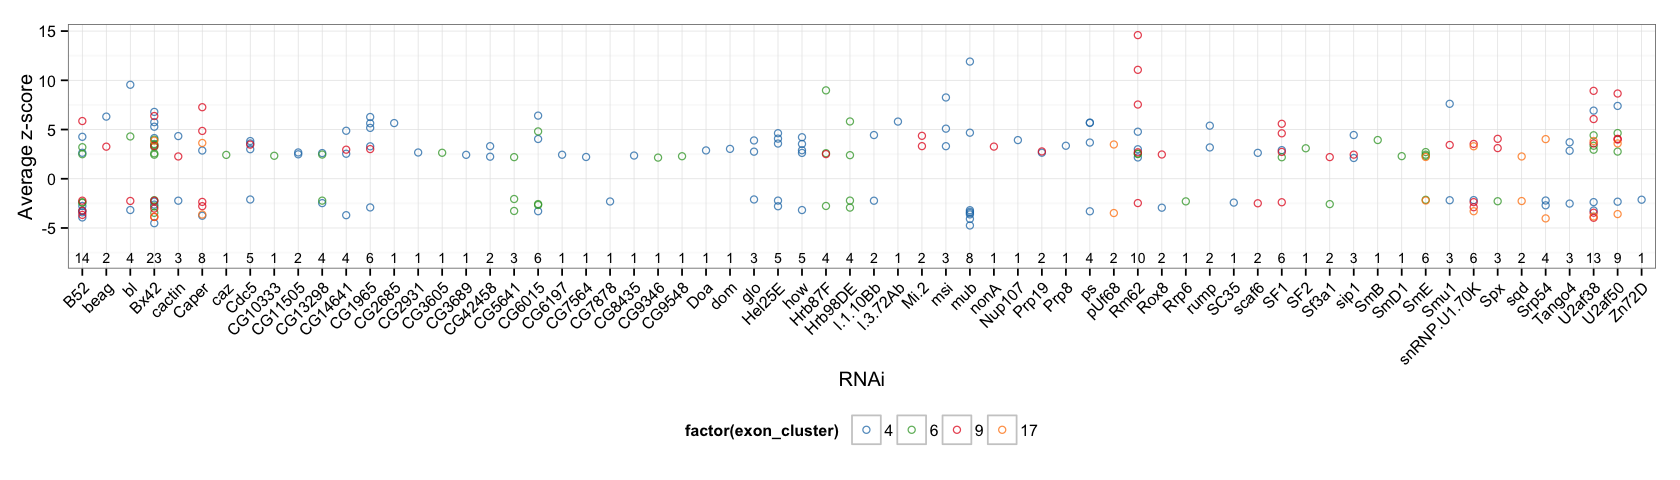

In [11]:
w = 14; h = 4; options(repr.plot.width = w, repr.plot.height = h)

sig.hits.n <- ddply(sig.hits, "protein", summarize, n = length(protein))

ggplot(sig.hits, aes(x = protein, y = average.z, color = factor(exon_cluster))) +
  geom_point(shape = 1, alpha = 0.75) + 
  geom_text(data = sig.hits.n, aes(x = protein, y = -8, label = n), color = "black", size = 3) +
  scale_color_manual(values = brewer.pal(8, "Paired")[c(2, 4, 6, 8)]) +
  xlab("RNAi") + 
  ylab("Average z-score") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "bottom")
ggsave("Figures/Figure 2B. Significant hits by exon cluster (horizontal).pdf", width = w, height = h)

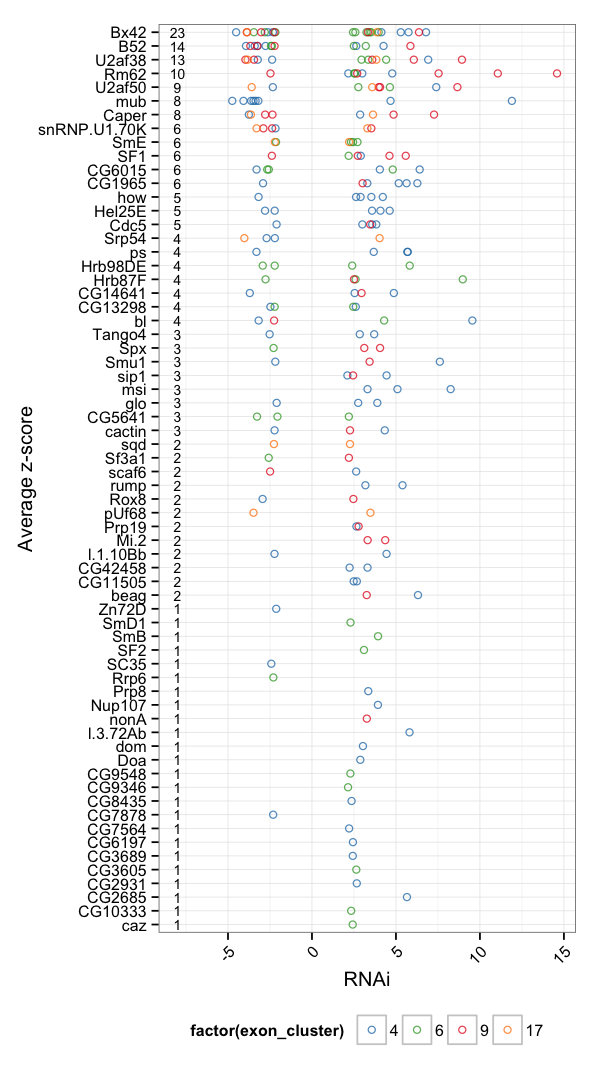

In [12]:
w = 5; h = 9; options(repr.plot.width = w, repr.plot.height = h)

sig.hits.n <- ddply(sig.hits, "protein", summarize, n = length(protein))
sig.hits$protein <- factor(sig.hits$protein, levels = sig.hits.n$protein[order(sig.hits.n$n)])

ggplot(sig.hits, aes(y = protein, x = average.z, color = factor(exon_cluster))) +
geom_point(shape = 1, alpha = 0.75) + 
  geom_text(data = sig.hits.n, aes(y = protein, x = -8, label = n), color = "black", size = 3) +
  scale_color_manual(values = brewer.pal(8, "Paired")[c(2, 4, 6, 8)]) +
  xlab("RNAi") + 
  ylab("Average z-score") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "bottom")
ggsave("Figures/Figure 2B. Significant hits by exon cluster (vertical).pdf", width = w, height = h)

# Figure 2B. Z-score heatmap

In [13]:
colnames(sig.matrix) <- as.character(gsub("X", "", colnames(sig.matrix)))
filter <- unique(c(which(apply(sig.matrix, 2, max, na.rm = T) > 1.96), which(apply(sig.matrix, 2, min, na.rm = T) < -1.96)))
filter <- filter[order(filter)]
sig.matrix.filter <- as.matrix(sig.matrix[, filter])

pal <- brewer.pal(n = 8, "Paired")
exon_col <- colnames(sig.matrix.filter)
exon_col <- gsub("^4.*", pal[2], exon_col)
exon_col <- gsub("^6.*", pal[4], exon_col)
exon_col <- gsub("^9.*", pal[6], exon_col)
exon_col <- gsub("^17.*", pal[8], exon_col)

Warning message:
In FUN(newX[, i], ...): no non-missing arguments to max; returning -InfWarning message:
In FUN(newX[, i], ...): no non-missing arguments to min; returning Inf

pdf 
  2

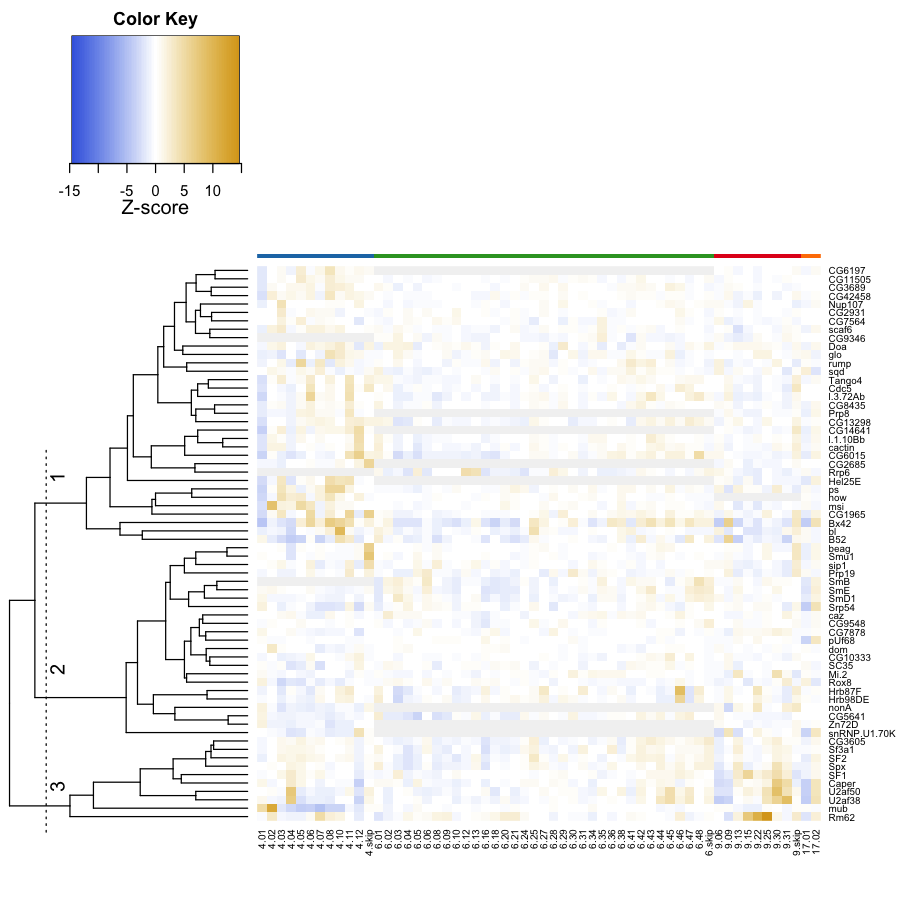

In [64]:
w = 7.5; h = 7.5; options(repr.plot.width = w, repr.plot.height = h)
colnames(sig.matrix) <- as.character(gsub("X", "", colnames(sig.matrix)))
par(xpd = T)
pdf("Figures/Figure 2B. Z-score heatmap.pdf", width = w, height = h)
heatmap.3(sig.matrix.filter, 
          Colv = F, 
          na.color = "gray95", 
          dendrogram = "row", 
          col = colorpanel(n = 100, low = "royalblue", mid = "white", high = "goldenrod"), 
          #trace = "row", 
          tracecol = NULL,
          linecol = "gray80",
          KeyValueName = "Z-score",
          ColSideColors = as.matrix(exon_col),
          lhei = c(2,5),
          lwid = c(2,5),
          side.height.fraction = 0.20
         )
mtext(side = 2, line = 1.5, text = "1", at = 0.44)
mtext(side = 2, line = 1.5, text = "2", at = 0.15)
mtext(side = 2, line = 1.5, text = "3", at = -0.025)
segments(x0 = -0.08, x1 = -0.08, y0 = 0.48, y1 = -0.1, lty = 3)
dev.off()
heatmap.3(sig.matrix.filter, 
          Colv = F, 
          na.color = "gray95", 
          dendrogram = "row", 
          col = colorpanel(n = 100, low = "royalblue", mid = "white", high = "goldenrod"), 
          #trace = "row", 
          tracecol = NULL,
          linecol = "gray80",
          KeyValueName = "Z-score",
          ColSideColors = as.matrix(exon_col),
          lhei = c(2,5),
          lwid = c(2,5),
          side.height.fraction = 0.20
         )
mtext(side = 2, line = 1.5, text = "1", at = 0.44)
mtext(side = 2, line = 1.5, text = "2", at = 0.15)
mtext(side = 2, line = 1.5, text = "3", at = -0.025)
segments(x0 = -0.08, x1 = -0.08, y0 = 0.48, y1 = -0.1, lty = 3)

Heirachical clustering groups the z-score profiles by exon 4 splicing, which distinguishes depletions that (1) generally reduce 4.1 splicing from those that generally increase 4.1 splicing or (2 and 3) have little effect). Between the latter groups (2 and 3), RNAi depletions are distinguished further by their effects on exon 9.

#### Notable clusters:

U2af50, U2af38, --- 3'ss --- 
4.04⬆, 4.12⬇;
6.44⬆, 6.45⬆, 6.47⬆; 
9.06⬇, 9.09⬇, 9.25⬆, 9.30⬆, 9.31⬆

U2af50, U2af38, SF1, Caper ---
4.04⬆, 4.12⬇;
9.06⬇, 9.09⬇, 9.25⬆, 9.30⬆, 9.31⬆

Bx42, B52 --- 

Tango4, Cdc5 --- Prp19 complex ---

#### Unique profiles:
mub --- KH domain protein; poly(C) binding --- 4.01⬆, 4.02⬆, 4.03 - 4.10⬇; 4.12⬇




# Figure 2.
A decent number of Illustrator changes later...

<img src="images/Figure%202.png"/>